In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML

import warnings 
warnings.filterwarnings('ignore')

In [2]:
HTML('''<script>
function code_toggle() {
 if (code_show){
 $('div.input').hide('500');
 $('div.prompt').hide();
 } else {
 $('div.input').show('500');
 $('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(function(){
    code_show=true;
    $('div.input').show()
    $('div.prompt').show();
  });
</script>
<font size="4" color='red'>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

## Collection of Data

In [3]:
legitimate_urls = pd.read_csv("extracted_csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("extracted_csv_files/phishing-urls.csv")
realtime=pd.read_csv("extracted_csv_files/real-time.csv")

In [4]:
legitimate_urls.head(10)
phishing_urls.head(10)
realtime.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,123movieonlinez.in.websiteoutlook.com,0,0,/,0,http,0,2,0,1,1,1,0,1,0,0,0
1,allmarketing.go2cloud.org,0,0,/aff_c,0,http,0,0,2,1,1,1,0,1,0,0,0
2,constintptr.com,0,0,/1675303/,0,http,0,0,0,1,1,1,0,1,0,0,0
3,constintptr.com,0,0,/,0,http,0,0,0,1,1,1,0,1,0,0,0
4,constintptr.com,0,0,/afu.php,0,http,0,0,1,1,1,1,0,1,0,0,0


## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe
Note: two dataframes has same column names

In [5]:
urls = legitimate_urls.append(phishing_urls)


In [6]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,1,1,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,1,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,1,1,1,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,0,0,1


In [7]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

#### Removing Unnecessary columns

In [8]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)
realtime = realtime.drop(realtime.columns[[0,3,5]],axis=1)

In [9]:
urls.head(5)

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,0,0,0,0,0,0,1,1,1,0,0,0,0,2
1,0,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,0,0,1,0,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,0,0,0,1


#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

#### Removing class variable from the dataset

In [11]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

real_without_labels = realtime.drop('label',axis=1)
real_without_labels.columns
r_labels = realtime['label']


#### splitting the data into train data and test data

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.1, random_state=100)
real_data_train, real_data_test, real_labels_train, real_labels_test = train_test_split(real_without_labels, r_labels, test_size=0.90, random_state=100)

In [13]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1828 204 1828 204


In [14]:
labels_train.value_counts()

#labels_train[labels_train == 0].count()
#labels_train[labels_train == 1].count()

0    936
1    892
Name: label, dtype: int64

In [15]:
labels_test.value_counts()

1    106
0     98
Name: label, dtype: int64

#### creating the model and fitting the data into the model

# DECISION TREE CLASSIFIER

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(data_train,labels_train)

pred_label_test = model.predict(data_test)
pred_label_train = model.predict(data_train)
real_pred_label=model.predict(real_data_test)

#print("STATIC TRAINING DATASET:")
#print(pred_label_train)

print("STATIC TESTING DATASET:")
print(pred_label_test)

print("REAL TIME DATASET:")
print(real_pred_label)

STATIC TESTING DATASET:
[1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0]
REAL TIME DATASET:
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 

In [17]:
#print(pred_label),print(list(labels_test))

# RANDOM FOREST CLASSIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
#RandomForestClassifier(n_estimators=5000, max_depth=350, max_leaf_nodes=12000)
#RandomForestClassifier()
random_forest_classifier.fit(data_train,labels_train)

prediction_label_test = random_forest_classifier.predict(data_test)
prediction_label_train = random_forest_classifier.predict(data_train)
real_pred_label_r=random_forest_classifier.predict(real_data_test)

#print("STATIC TRAINING DATASET:")
#print(prediction_label_train)

print("STATIC TESTING DATASET:")
print(prediction_label_test)

print("REAL TIME DATASET:")
print(real_pred_label_r)

STATIC TESTING DATASET:
[1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0]
REAL TIME DATASET:
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(data_train,labels_train)

lr_pred_test=lr.predict(data_test)
lr_pred_train=lr.predict(data_train)
lr_pred_real=lr.predict(real_data_test)

#print("STATIC TRAINING DATASET:")
#print(lr_pred_train)

print("STATIC TESTING DATASET:")
print(lr_pred_test)

print("REAL TIME DATASET:")
print(lr_pred_real)

STATIC TESTING DATASET:
[1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0]
REAL TIME DATASET:
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 

#### use 'custom_random_forest_classifier = RandomForestClassifier(n_estimators=10000, max_depth=40, max_leaf_nodes=20000)' or by changing the parameters for noticing how the accuracy changes.

In [22]:
#-----import matplotlib.pyplot as plt
#-----import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

#-----importances = random_forest_classifier.feature_importances_

#std = np.std([tree.feature_importances_ for tree in custom_random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
#-----indices = np.argsort(importances)[::-1] 
#-----print(f"indices of columns : {indices}")

# Print the feature ranking
#-----print("\n ***Feature ranking: *** \n")
#-----print("Feature name : Importance")

#-----for f in range(data_train.shape[1]):
    #-----print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
#-----print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
#-----plt.figure()
#-----plt.title("Feature importances")
#-----plt.bar(range(data_train.shape[1]), importances[indices],
       #-----color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

#-----plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
#-----plt.xlim([-1, data_train.shape[1]])

#-----plt.rcParams['figure.figsize'] = (450,150)  #this will increase the size of the plot
#-----plt.show()

# NAIVE BAYES CLASSIFIER

In [23]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

nv.fit(data_train,labels_train)

nv_pred_test=nv.predict(data_test)
nv_pred_train=nv.predict(data_train)
nv_pred_real=nv.predict(real_data_test)

#print("STATIC TRAINING DATASET:")
#print(nv_pred_train)

print("STATIC TESTING DATASET:")
print(nv_pred_test)

print("REAL TIME DATASET:")
print(nv_pred_real)

STATIC TESTING DATASET:
[1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
REAL TIME DATASET:
[0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 1 

# Creating confusion matrix and checking the accuracy

#### DECISION TREE 

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(labels_test,pred_label_test)
cm2 = confusion_matrix(labels_train,pred_label_train)

cr=classification_report(labels_test,pred_label_test)
cr2=classification_report(labels_train,pred_label_train)

#print(cm)
#print(cm2) 

#print("Decision Tree Training")
#dt_train_score=accuracy_score(labels_train,pred_label_train)
#print(dt_train_score)
#fig2, ax2 = plot_confusion_matrix(cm2 ,  figsize=(10, 5))
#plt.show()
#print(cr2)

print("Decision Tree Testing")
dt_test_score=accuracy_score(labels_test,pred_label_test)
print(dt_test_score)
fig, ax = plot_confusion_matrix(cm,  figsize=(10, 5))
plt.show()
print(cr)

ModuleNotFoundError: No module named 'mlxtend'

#### RANDOM FOREST 

Random Forest Testing
0.9607843137254902


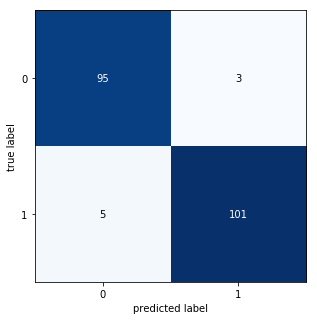

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       106

   micro avg       0.96      0.96      0.96       204
   macro avg       0.96      0.96      0.96       204
weighted avg       0.96      0.96      0.96       204



In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

cm_rf = confusion_matrix(labels_test,prediction_label_test)
cm2_rf = confusion_matrix(labels_train,prediction_label_train)

cr_rf=classification_report(labels_test,prediction_label_test)
cr2_rf=classification_report(labels_train,prediction_label_train)

#print(cm)
#print(cm2)

#print("Random Forest Training")
#rf_train_score=accuracy_score(labels_train,prediction_label_train)
#print(rf_train_score)
#fig2_rf, ax2_rf = plot_confusion_matrix(cm2_rf ,  figsize=(10, 5))
#plt.show()
#print(cr2_rf)

print("Random Forest Testing")
rf_test_score=accuracy_score(labels_test,prediction_label_test)
print(rf_test_score)
fig_rf, ax_rf = plot_confusion_matrix(cm_rf,  figsize=(10, 5))
plt.show()
print(cr_rf)

#### NAIVE BAYES

Naive Bayes Testing
0.8431372549019608


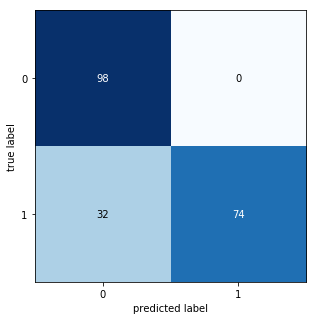

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        98
           1       1.00      0.70      0.82       106

   micro avg       0.84      0.84      0.84       204
   macro avg       0.88      0.85      0.84       204
weighted avg       0.88      0.84      0.84       204



In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

cm_nb = confusion_matrix(labels_test,nv_pred_test)
cm2_nb = confusion_matrix(labels_train,nv_pred_train)

cr_nb=classification_report(labels_test,nv_pred_test)
cr2_nb=classification_report(labels_train,nv_pred_train)

#print(cm)
#print(cm2)




#print("Naive Bayes Training")
#nb_train_score=accuracy_score(labels_train,nv_pred_train)
#print(nb_train_score)
#fig2nb, ax2nb = plot_confusion_matrix(cm2_nb ,  figsize=(10, 5))
#plt.show()
#print(cr2_nb)

print("Naive Bayes Testing")
nb_test_score=accuracy_score(labels_test,nv_pred_test)
print(nb_test_score)
fignb, axnb = plot_confusion_matrix(cm_nb,  figsize=(10, 5))
plt.show()
print(cr_nb)

#### LOGISTIC REGRESSION

Logistic Regression Testing
0.9509803921568627


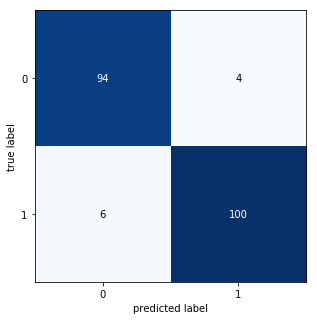

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95       106

   micro avg       0.95      0.95      0.95       204
   macro avg       0.95      0.95      0.95       204
weighted avg       0.95      0.95      0.95       204



In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

cm_lr = confusion_matrix(labels_test,lr_pred_test)
cm2_lr = confusion_matrix(labels_train,lr_pred_train)

cr_lr=classification_report(labels_test,lr_pred_test)
cr2_lr=classification_report(labels_train,lr_pred_train)

#print(cm)
#print(cm2)




#print("Logistic Regression Training")
#lr_train_score=accuracy_score(labels_train,lr_pred_train)
#print(lr_train_score)
#fig2lr, ax2lr = plot_confusion_matrix(cm2_lr ,  figsize=(10, 5))
#plt.show()
#print(cr2_lr)

print("Logistic Regression Testing")
lr_test_score=accuracy_score(labels_test,lr_pred_test)
print(lr_test_score)
figlr, axlr = plot_confusion_matrix(cm_lr,  figsize=(10, 5))
plt.show()
print(cr_lr)

## Saving the predicted class into respective files

In [26]:
np.savetxt("DecisionTreepredictionTest.txt",pred_label_test)
np.savetxt("DecisionTreepredictionTrain.txt",pred_label_train)
np.savetxt("DecisionTreepredictionReal.txt",real_pred_label)

np.savetxt("RFpredictionTest.txt",prediction_label_test)
np.savetxt("RFpredictionTrain.txt",prediction_label_train)
np.savetxt("RFpredictionReal.txt",real_pred_label_r)

np.savetxt("NBpredictionTest.txt",nv_pred_test)
np.savetxt("NBpredictionTrain.txt",nv_pred_train)
np.savetxt("NBpredictionReal.txt",nv_pred_real)

np.savetxt("LRpredictionTest.txt",lr_pred_test)
np.savetxt("LRpredictionTrain.txt",lr_pred_train)
np.savetxt("LRpredictionReal.txt",lr_pred_real)

# Comparative study

In [27]:
#scores_train = [dt_train_score,rf_train_score,lr_train_score,nb_train_score]
#algorithms = ["Decision Tree","Random forest tree","Logistic Regression","Naive Bayes"]  

#import seaborn as sns

#sns.set(rc={'figure.figsize':(7,8)})

#plt.xlabel("Algorithms")
#plt.ylabel("Training Accuracy score")

#sns.barplot(algorithms,scores_train)

### TESTING

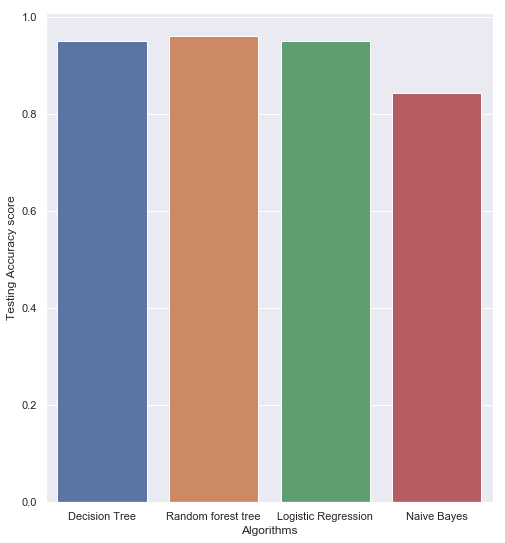

In [32]:
scores_test = [dt_test_score,rf_test_score,lr_test_score,nb_test_score]
algorithms = ["Decision Tree","Random forest tree","Logistic Regression","Naive Bayes"]  

import seaborn as sns

sns.set(rc={'figure.figsize':(8,9)})

plt.xlabel("Algorithms")
plt.ylabel("Testing Accuracy score")

sns.barplot(algorithms,scores_test)